# Itens para o relatório

## Título e seções usando #, ## e ###

## Índice com os links para as seções do trabalho

## Um breve contexto

## Definição das hipóteses

## Descrição dos experimentos para testar as hipóteses

## Gerar gráficos que comprovem as hipóteses formuladas

## Análise dos resultados

## Considerações finais

# Comando

Avaliar para diferentes tamanhos de populações o comportamento de um algoritmo aleatório para encontrar palavras binárias.

O tamanho da população minimo é 20 e deve-se avaliar pelo menos 4 diferentes tamanhos de população.

A população deve ser avaliada em relação a palavra alvo. Para cada palavra da população é dada uma nota baseada em quanto ela é semelhante a palavra alvo.

A população então é ordenada e as 50% palavras piores são descartadas, sendo substituídas por outras palavas aleatórias. O processo continua até que palavra alvo seja encontrada ou que seja alcançado um número máximo de gerações sem que o algoritmo evolua.

Para cada cenário avaliado, o algoritmo deve ser executado pelo menos 5 vezes. Sempre fazer as análises em função de médias e variâncias.

Avaliar o comportamento do algoritmo com o aumento da complexidade e também o tamanho da população.



# Palavras alvo

In [2]:
Palavra_A = 0b1110010001000110 #15 genes

Palavra_B = 0b10110110011010000000011111 #25 genes

Palavra_C = 0b11110001010100000110100111000100011000110 #40 genes


# Funções que podem ajuda

In [3]:
pathFileImages = 'C:/Users/claud/Dropbox/RepoGit/Disciplina/Computação Evolucionária/Jupyter/'


from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr

In [4]:
def invertBit( palavra, posBit ):
    
    if posBit > palavra.bit_length():
        return -1
    elif posBit == 0:
        return -2
    
    mask =  1 << posBit - 1
    return palavra ^ mask


def criarPalavra( nBits ):
    
    palavra = 1 << nBits
    
    for i in range(1,nBits + 1):
        if npr.rand( ) > 0.5:            
            palavra = invertBit( palavra, i )
            #print( 'Criando palavras aleatórias/criandoPalavras/AlterarBit', i, ' = ', bin(palavra) )
            
            
    return palavra


def compararPalavras( palavra1, palavra2 ):
    
    return bin( palavra1 ^ palavra2 ).count("1")


def printPop( pop ):
    
    for i in range(len(pop)): 
        print( bin( pop[ i ] ) )
        
def calcFitnessPalavraBin( pop, palavraAlvo, nPrimeiras = -1 ):
    fitness = [ ]
    if nPrimeiras == -1:
        for i in range(len(pop)):
            fitness.append( sizeBin - compararPalavras( palavraAlvo, pop[ i ] ) )
    else:
        for i in range(nPrimeiras):
            fitness.append( sizeBin - compararPalavras( palavraAlvo, pop[ i ] ) )
            
    return fitness

def criarPop( sizePop, sizeBin ):
    pop = [ ]
    for i in range(sizePop):
        pop.append( criarPalavra( sizeBin ) )
    
    return pop

def trocarPalavras( pop, fitness, sizePopToChange, sizeBin ):
    popTemp = criarPop( sizePopToChange, sizeBin ) 
    pop[0:sizePopToChange] = popTemp[0:sizePopToChange]
    fitness[0:sizePopToChange] =  -1*np.ones(sizePopToChange, int) 

# Exemplo de uso

In [5]:
sizeBin = 4

palavraAlvo = criarPalavra( sizeBin )
print('A palavra alvo é ', bin( palavraAlvo ) )

A palavra alvo é  0b11110


In [6]:
pop_ =  []
fitness = []
sizePop = 6

pop_ = criarPop( sizePop, sizeBin )        
#printPop( pop_ )
#print('\n')
      
fitness = calcFitnessPalavraBin( pop_, palavraAlvo )

#print(  fitness, pop_  )

def ordenarPopbyFitness(fitness, pop):
    return list( zip(*sorted(zip(fitness, pop_), key = lambda pair: pair[0])) )

fitPop = ordenarPopbyFitness(fitness, pop_)
pop_ = list( fitPop[ 1 ] )
fitness = list( fitPop[ 0 ] )

printPop( pop_ )
print(  fitness )


sizePopToChange = 3
trocarPalavras( pop_, fitness, sizePopToChange,  sizeBin )
    
printPop( pop_ )
print(  fitness )

fitness[0:sizePopToChange] = calcFitnessPalavraBin( pop_, palavraAlvo, nPrimeiras = sizePopToChange )

printPop( pop_ )
print(  fitness )

fitPop = ordenarPopbyFitness(fitness, pop_)
pop_ = list( fitPop[ 1 ] )
fitness = list( fitPop[ 0 ] )

printPop( pop_ )
print(  fitness )

0b10011
0b11101
0b11101
0b10111
0b11100
0b11010
[1, 2, 2, 2, 3, 3]
0b10010
0b11000
0b10001
0b10111
0b11100
0b11010
[-1, -1, -1, 2, 3, 3]
0b10010
0b11000
0b10001
0b10111
0b11100
0b11010
[2, 2, 0, 2, 3, 3]
0b10001
0b10010
0b11000
0b10111
0b11100
0b11010
[0, 2, 2, 2, 3, 3]


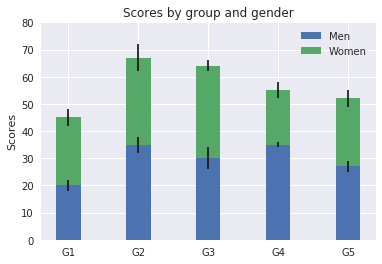

In [7]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

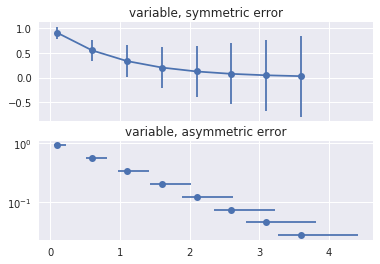

In [8]:
# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example error bar values that vary with x-position
error = 0.1 + 0.2 * x

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(x, y, yerr=error, fmt='-o')
ax0.set_title('variable, symmetric error')

# error bar values w/ different -/+ errors that
# also vary with the x-position
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

ax1.errorbar(x, y, xerr=asymmetric_error, fmt='o')
ax1.set_title('variable, asymmetric error')
ax1.set_yscale('log')
plt.show()

/usr/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


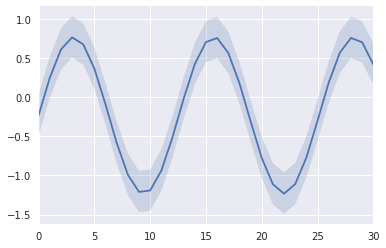

[ 0.          0.47942554  0.84147098  0.99749499  0.90929743  0.59847214
  0.14112001 -0.35078323 -0.7568025  -0.97753012 -0.95892427 -0.70554033
 -0.2794155   0.21511999  0.6569866   0.93799998  0.98935825  0.79848711
  0.41211849 -0.07515112 -0.54402111 -0.87969576 -0.99999021 -0.87545217
 -0.53657292 -0.0663219   0.42016704  0.80378443  0.99060736  0.93489506
  0.65028784]
[[-0.09194992]
 [-1.46335065]
 [ 1.08179168]
 [-0.23932517]
 [-0.49112914]
 [-1.00227201]
 [ 0.9188215 ]
 [-1.1036321 ]
 [ 0.62649346]
 [-0.56151378]]
[[-0.09194992  0.38747562  0.74952106  0.90554507  0.81734751  0.50652222
   0.04917009 -0.44273315 -0.84875242 -1.06948004 -1.05087419 -0.79749025
  -0.37136542  0.12317007  0.56503668  0.84605006  0.89740833  0.70653719
   0.32016857 -0.16710104 -0.63597103 -0.97164568 -1.09194013 -0.96740209
  -0.62852284 -0.15827182  0.32821712  0.71183451  0.89865744  0.84294514
   0.55833792]
 [-1.46335065 -0.98392511 -0.62187967 -0.46585567 -0.55405323 -0.86487851
  -1.322230

In [9]:
import numpy as np; np.random.seed(22)
import seaborn as sns; sns.set(color_codes=True)
x = np.linspace(0, 15, 31)

a = np.random.randn(10, 1)

data = np.sin(x) + a #+ np.random.rand(10, 31)
ax = sns.tsplot(data=data)

plt.show( )

print(  np.sin(x)  )
print( a )
print( data )
#print( len( np.random.rand(10, 31) ) )

#